# Introduction to `ospgrid`

`ospgrid` provides a user-friendly interface to OpenSeesPy for the analysis of elastic plane grids.
This tutorial shows its basic use.

In [1]:
# This cell not necessary once ospgrid is installed
import sys
sys.path.append("../../..")

In [2]:
# Basic imports
import ospgrid as ospg  # The main package
from IPython import display  # For images in this notebook

## Example 1
This example is based on the Semester 1 2021 Exam question for the class *CIV4280 Bridge Design & Assessment* at Monash University, Melbourne.

We consider the following grid, taking the following for all members:

- $EI = 10\times10^3$ kNm2
- $GJ = 5\times 10^3$ kNm2

To keep units consistent, we will maintain forces in kN and distances in m.



In [3]:
grid = ospg.Grid()

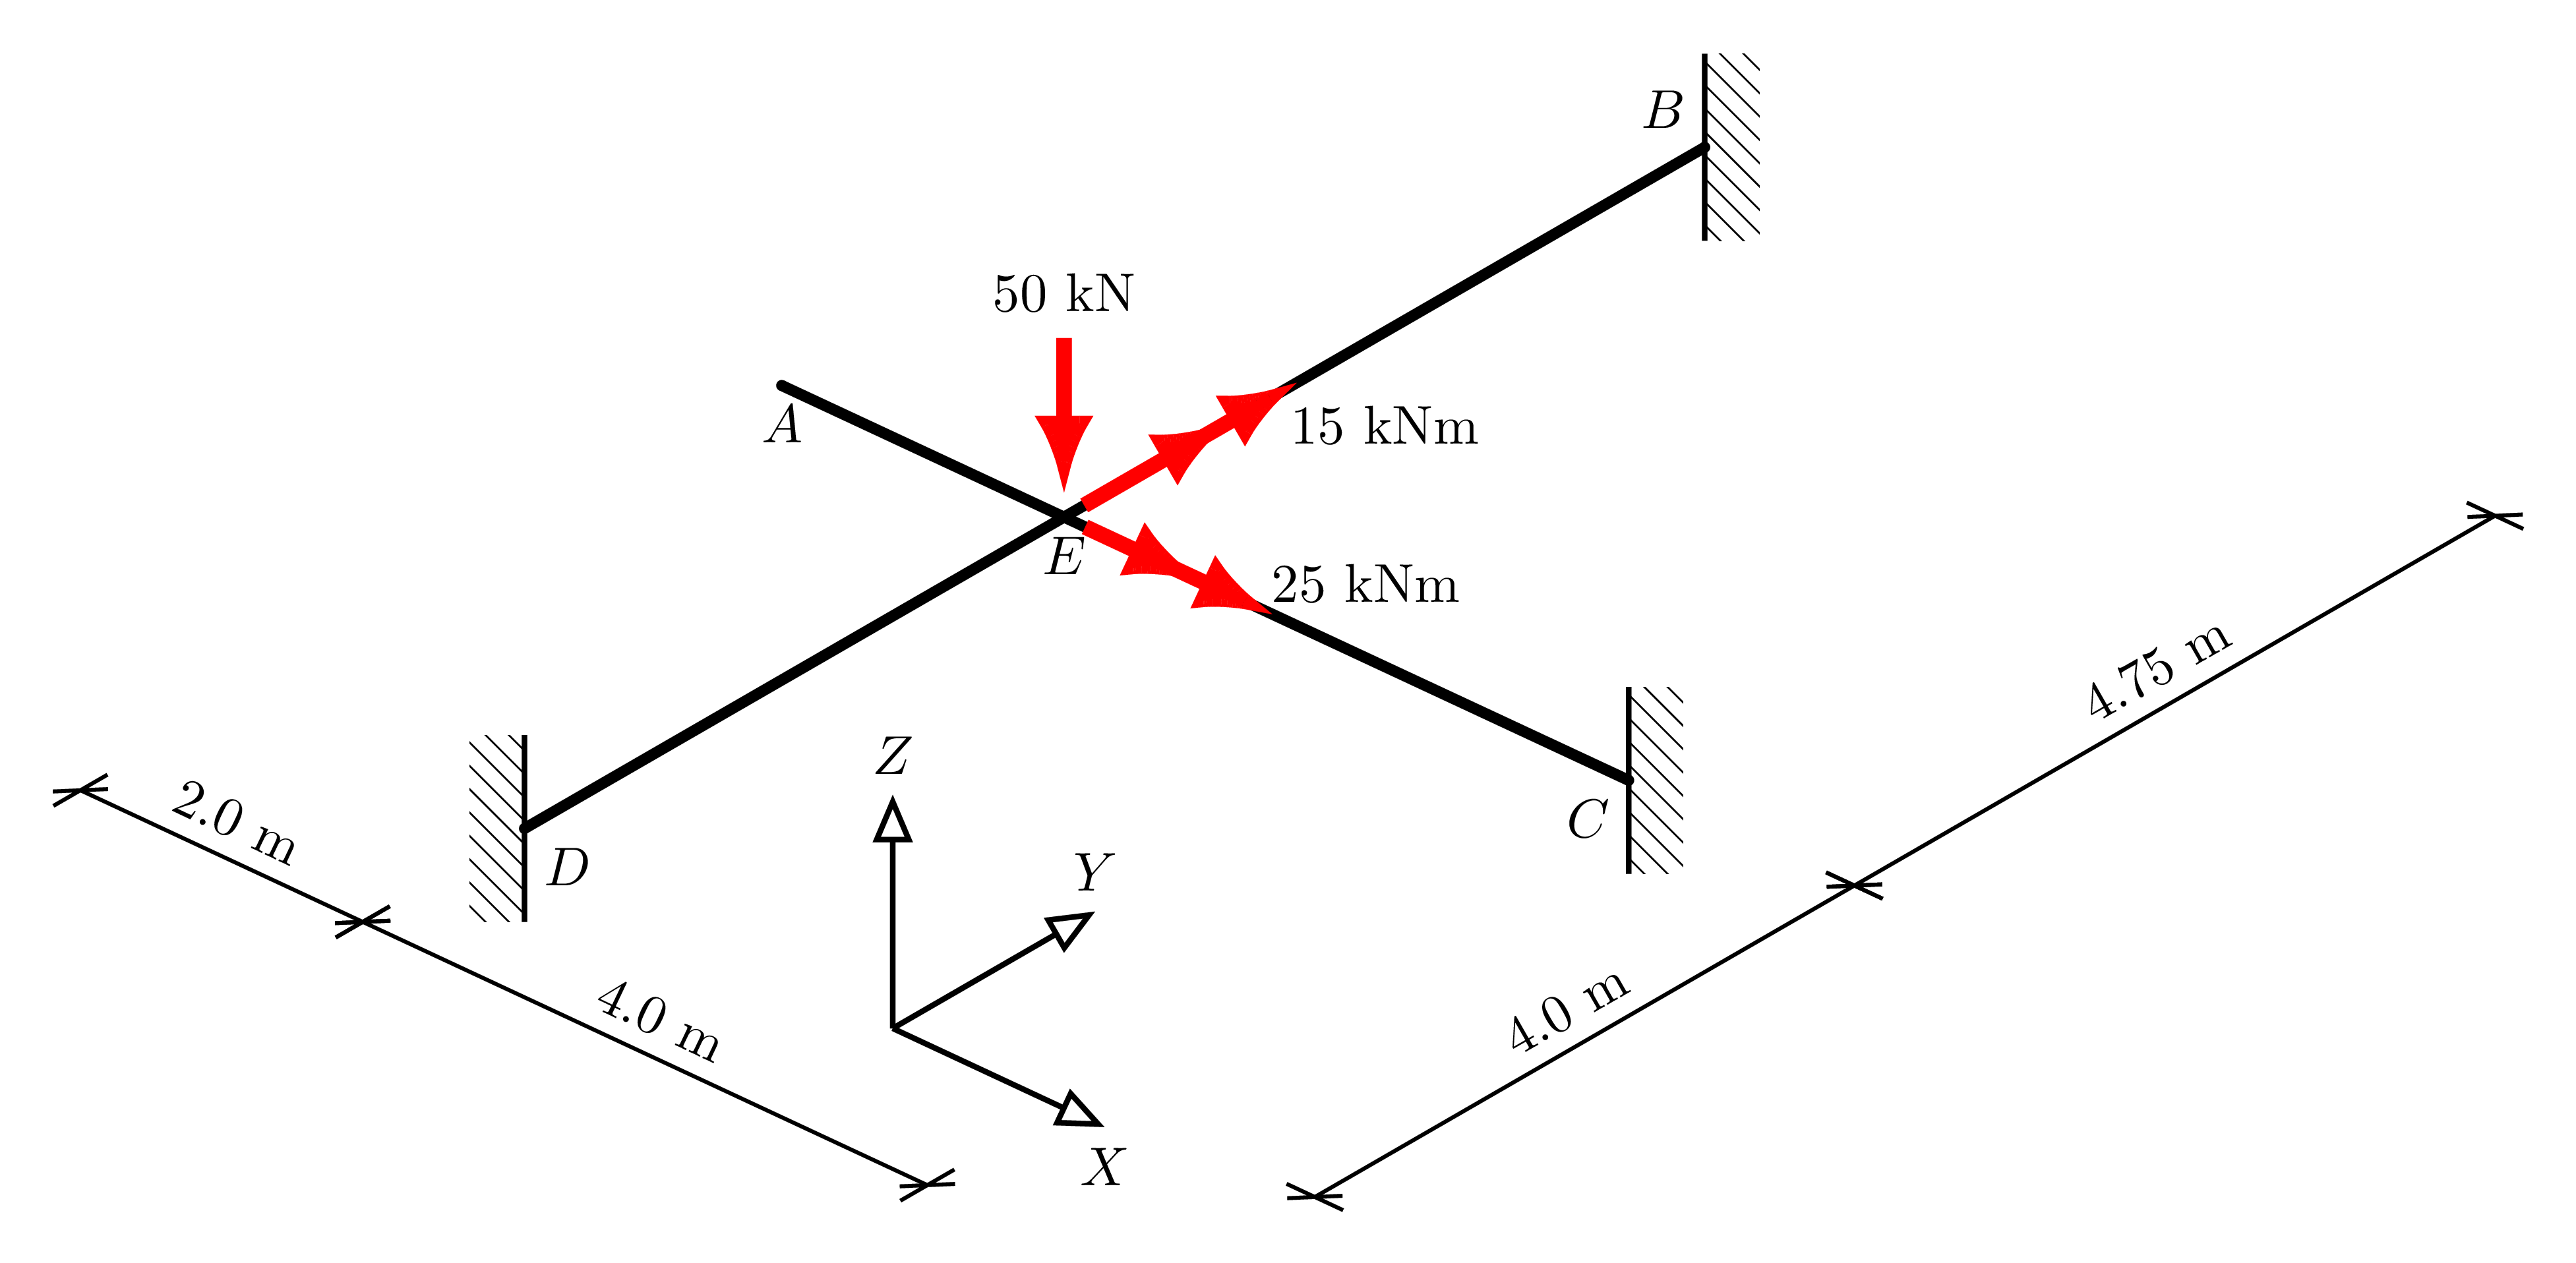

In [4]:
display.Image("./images/intro_ex_1.png",width=800)

Taking node $E$ as the origin of the coordinate system, using user-friendly labels, we define the nodes then as:

In [5]:
grid.add_node("A", -2.0, 0.0)
grid.add_node("B", 0.0, 4.75)
grid.add_node("C", 4.0, 0.0)
grid.add_node("D", 0.0, -4.0)
grid.add_node("E", 0.0, 0.0);

And similarly, for the members, we set the flexural and torsional rigidities and add members connecting the relevant nodes, using the nice labelling.

In [6]:
EI = 10e3 # kNm2
GJ = 5e3
grid.add_member("A", "E", EI, GJ)
grid.add_member("B", "E", EI, GJ)
grid.add_member("C", "E", EI, GJ)
grid.add_member("D", "E", EI, GJ);

The loads are added similarly, using intuitive arguments:

In [7]:
grid.add_load("E", Fz=-90, Mx=30, My=60)

And supports are defined by adding a pre-defined support type to a node.

In [8]:
grid.add_support("B", ospg.Support.FIXED)
grid.add_support("C", ospg.Support.FIXED)
grid.add_support("D", ospg.Support.FIXED)

And now we can run the analysis:

In [9]:
ops = grid.analyze()

And extract all of the displacements for a node:

In [10]:
dE = grid.get_displacement("E")
print(dE)

[0.0, 0.0, -0.01910652891244266, 0.00046566509286755174, -0.0009469098824023108, 0.0]


We can also get the reactions at a node, and here we get just one we are interested in (vertical force reaction):

In [11]:
rB = grid.get_reactions("B", dof=3)
print(rB)

20.155184539095416


Finally, we can plot the results:

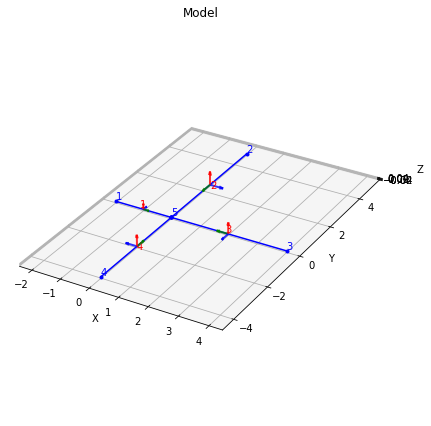

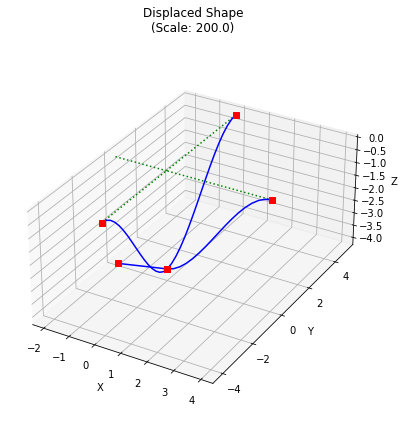

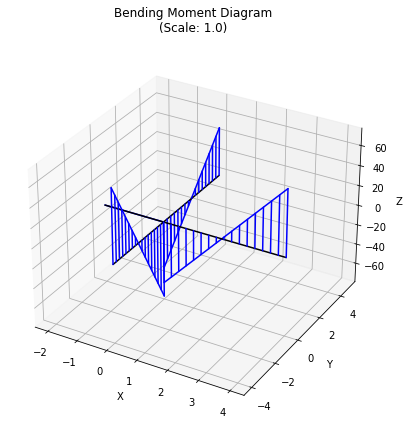

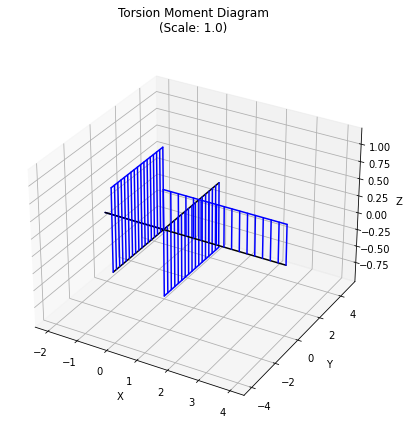

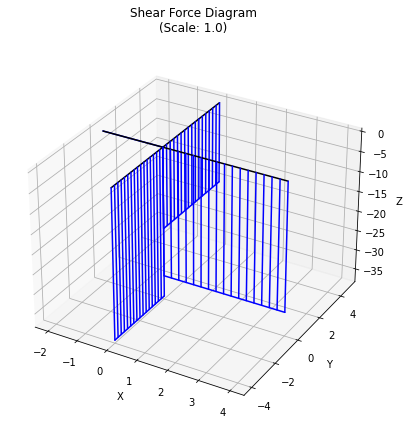

In [12]:
grid.plot_results();

## Example 2

This example is based on the Semester 1 2020 Exam question for the same class as *Example 1*.

We consider the following grid, taking the following for all members:

- $EI = 30\times10^3$ kNm2
- $GJ = 5\times 10^3$ kNm2

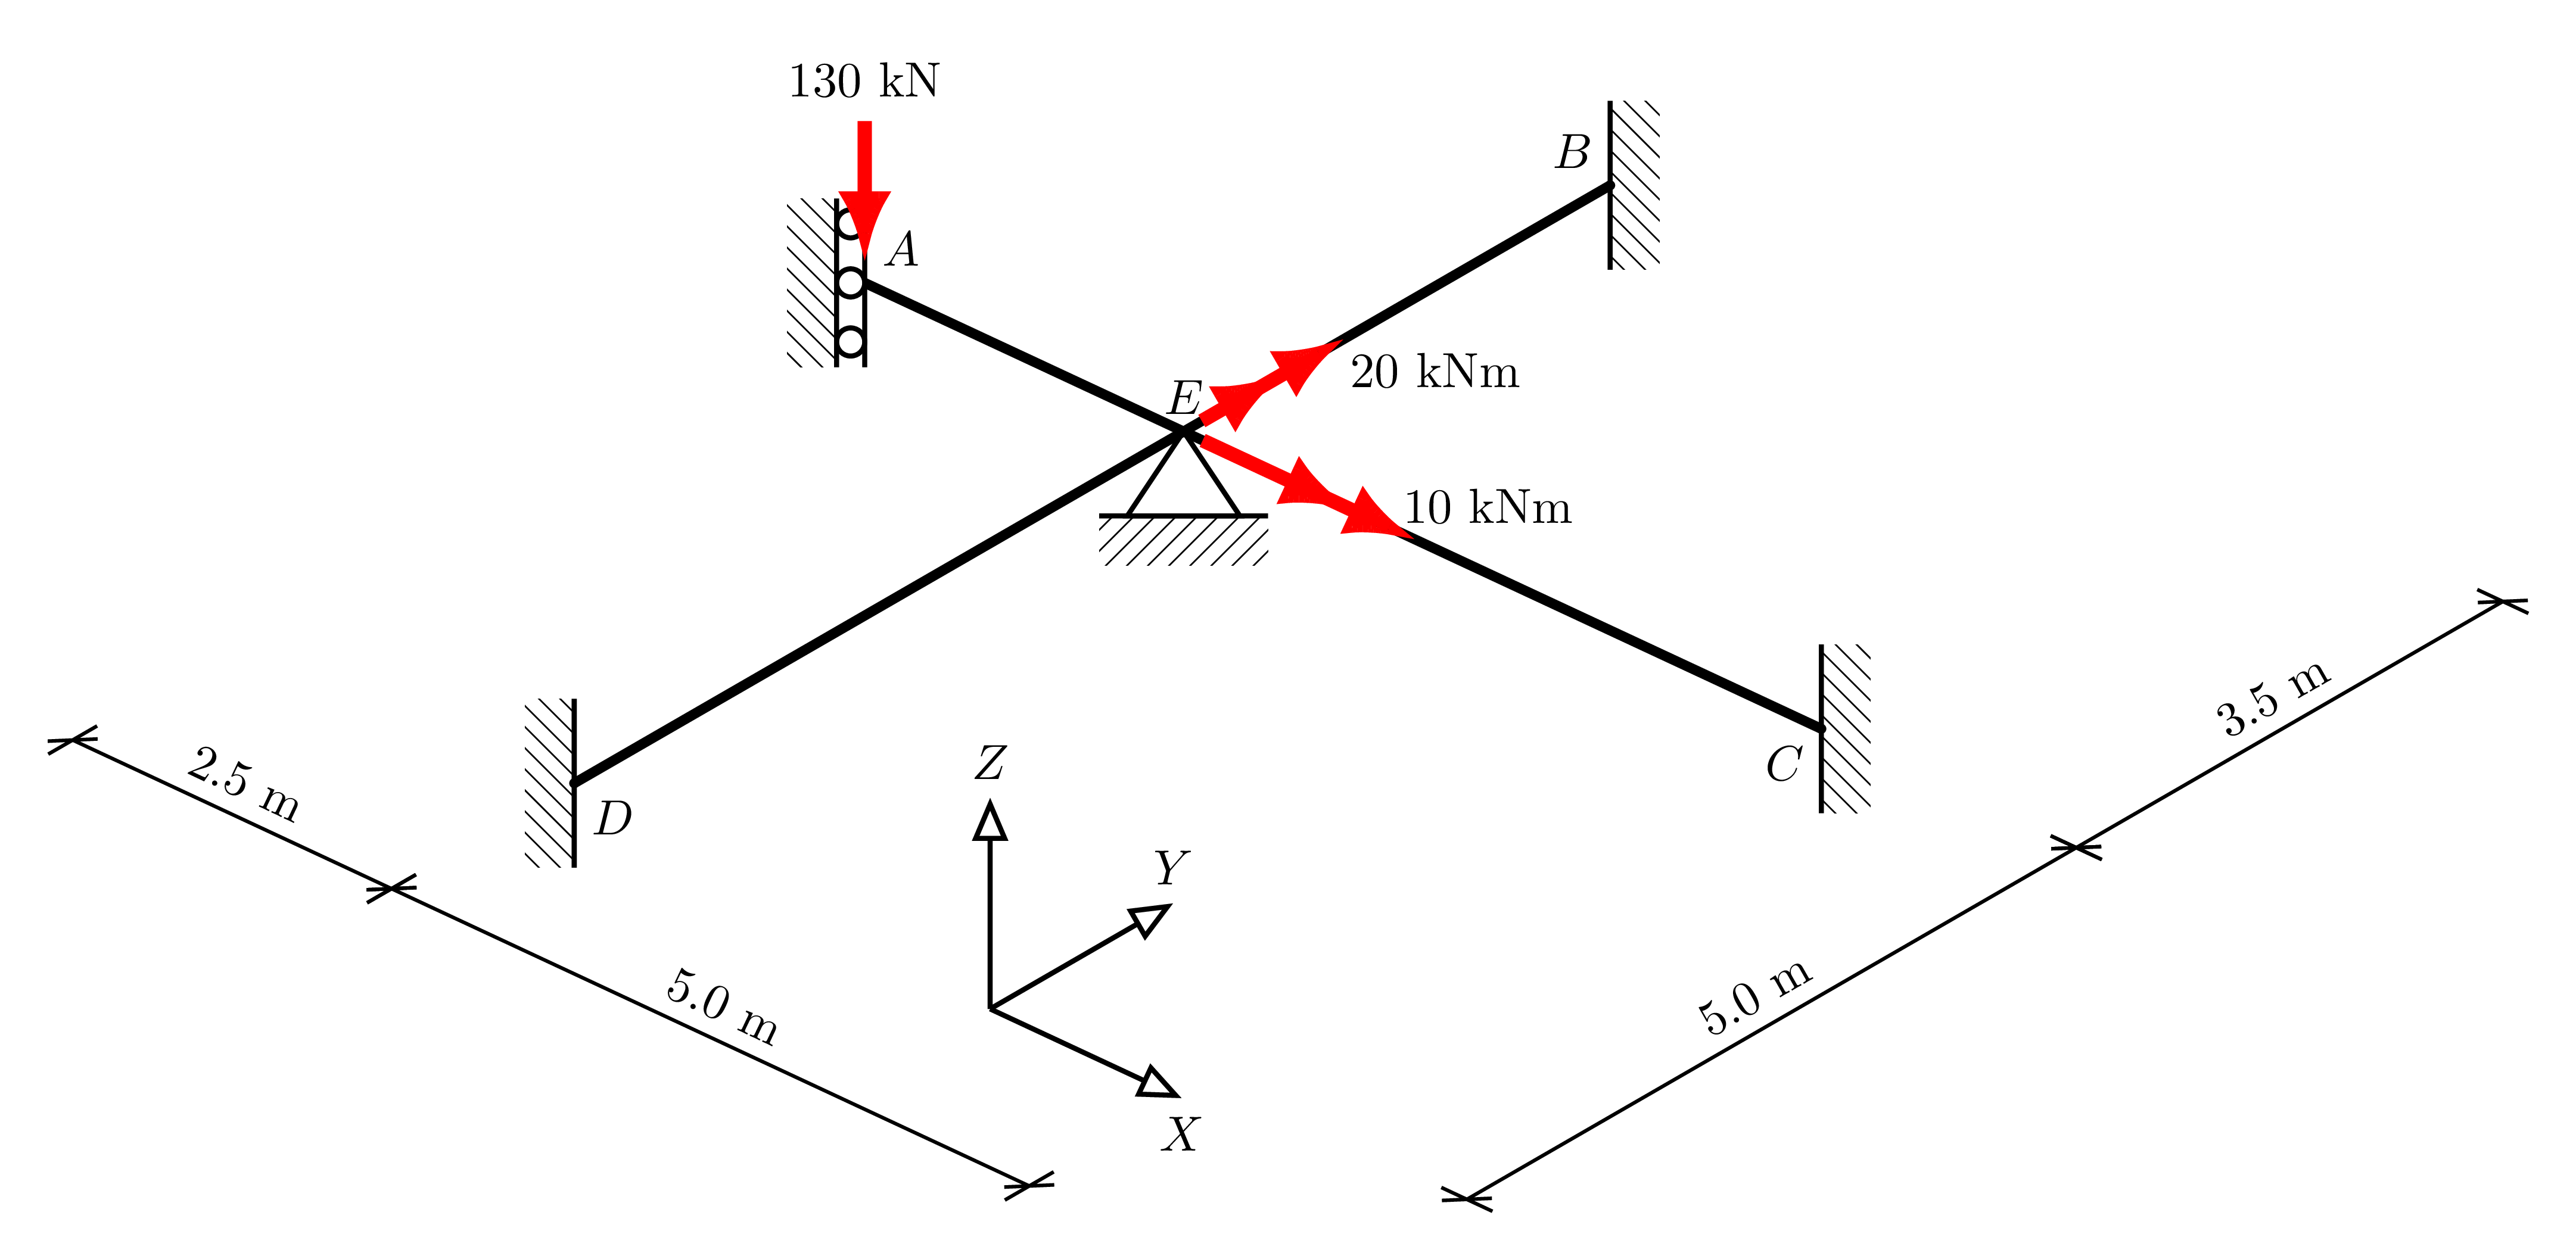

In [13]:
display.Image("./images/intro_ex_2.png",width=800)

Make a new grid object

In [14]:
grid = ospg.Grid()

As before, taking node $E$ as the origin of the coordinate system, the nodes are defined as:

In [15]:
grid.add_node("A", -2.5, 0.0)
grid.add_node("B", 0.0, 3.5)
grid.add_node("C", 5.0, 0.0)
grid.add_node("D", 0.0, -5.0)
grid.add_node("E", 0.0, 0.0);

And similarly, for the members, we set the flexural and torsional rigidities and add members connecting the relevant nodes, using the nice labelling.

In [16]:
EI = 30e3 # kNm2
GJ = 5e3
grid.add_member("A", "E", EI, GJ)
grid.add_member("B", "E", EI, GJ)
grid.add_member("C", "E", EI, GJ)
grid.add_member("D", "E", EI, GJ);

The loads are added similarly, using intuitive arguments in consistent units (kN and kNm):

In [17]:
grid.add_load("A", Fz=-130)
grid.add_load("E", Mx=10, My=20)

Next, we can use single character short-cuts to define the supports, as follows:

- "X" = `ospg.Support.PINNED_X`
- "Y" = `ospg.Support.PINNED_Y`
- "F" = `ospg.Support.FIXED`
- "V" = `ospg.Support.FIXED_V_ROLLER`
- "P" = `ospg.Support.PROP`

Note that a `PROP` is different to a `PINNED` support as it only restrains translation in the $z$-axis. In contrast, a `PINNED` support also restrains the twist of the connecting member (hence `PINNED_X` and `PINNED_Y`).

In [18]:
grid.add_support("A", "V")
grid.add_support("B", "F")
grid.add_support("C", "F")
grid.add_support("D", "F")
grid.add_support("E", "P")

And now we can run the analysis:

In [19]:
ops = grid.analyze()

Finally, we can selectively plot the grid and bending moment diagram, changing some plotting parameters too, for example:

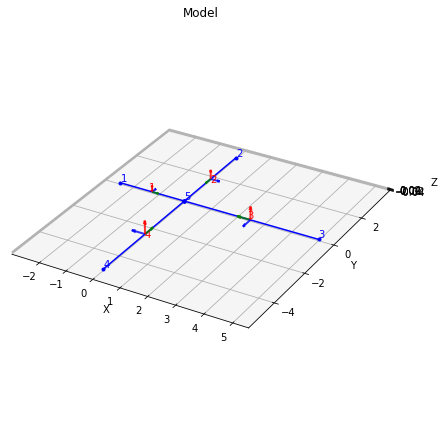

In [20]:
grid.plot_grid(figsize=(6,6),axes_on=True);

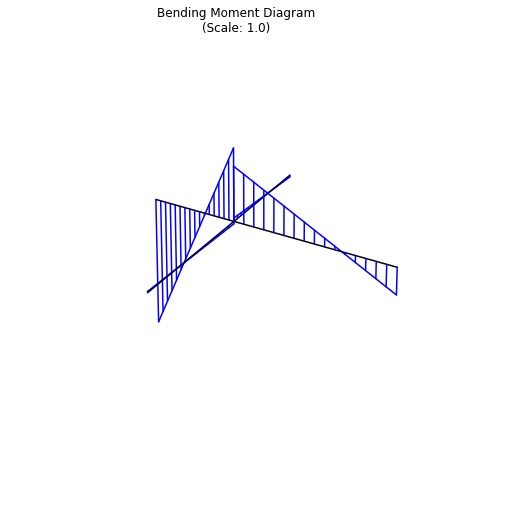

In [21]:
grid.plot_bmd(figsize=(8,8),axes_on=False);

## Example 3

A utility function `make_grid` is included in `ospgrid`, which accepts a single string describing the grid. The string follows the grid specification described in the `make_grid()` [documentation](../gen/ospgrid.grid.make_grid.rst#ospgrid.grid.make_grid). It is useful for saving grid definitions, for example.

Here, we analyze the following grid:

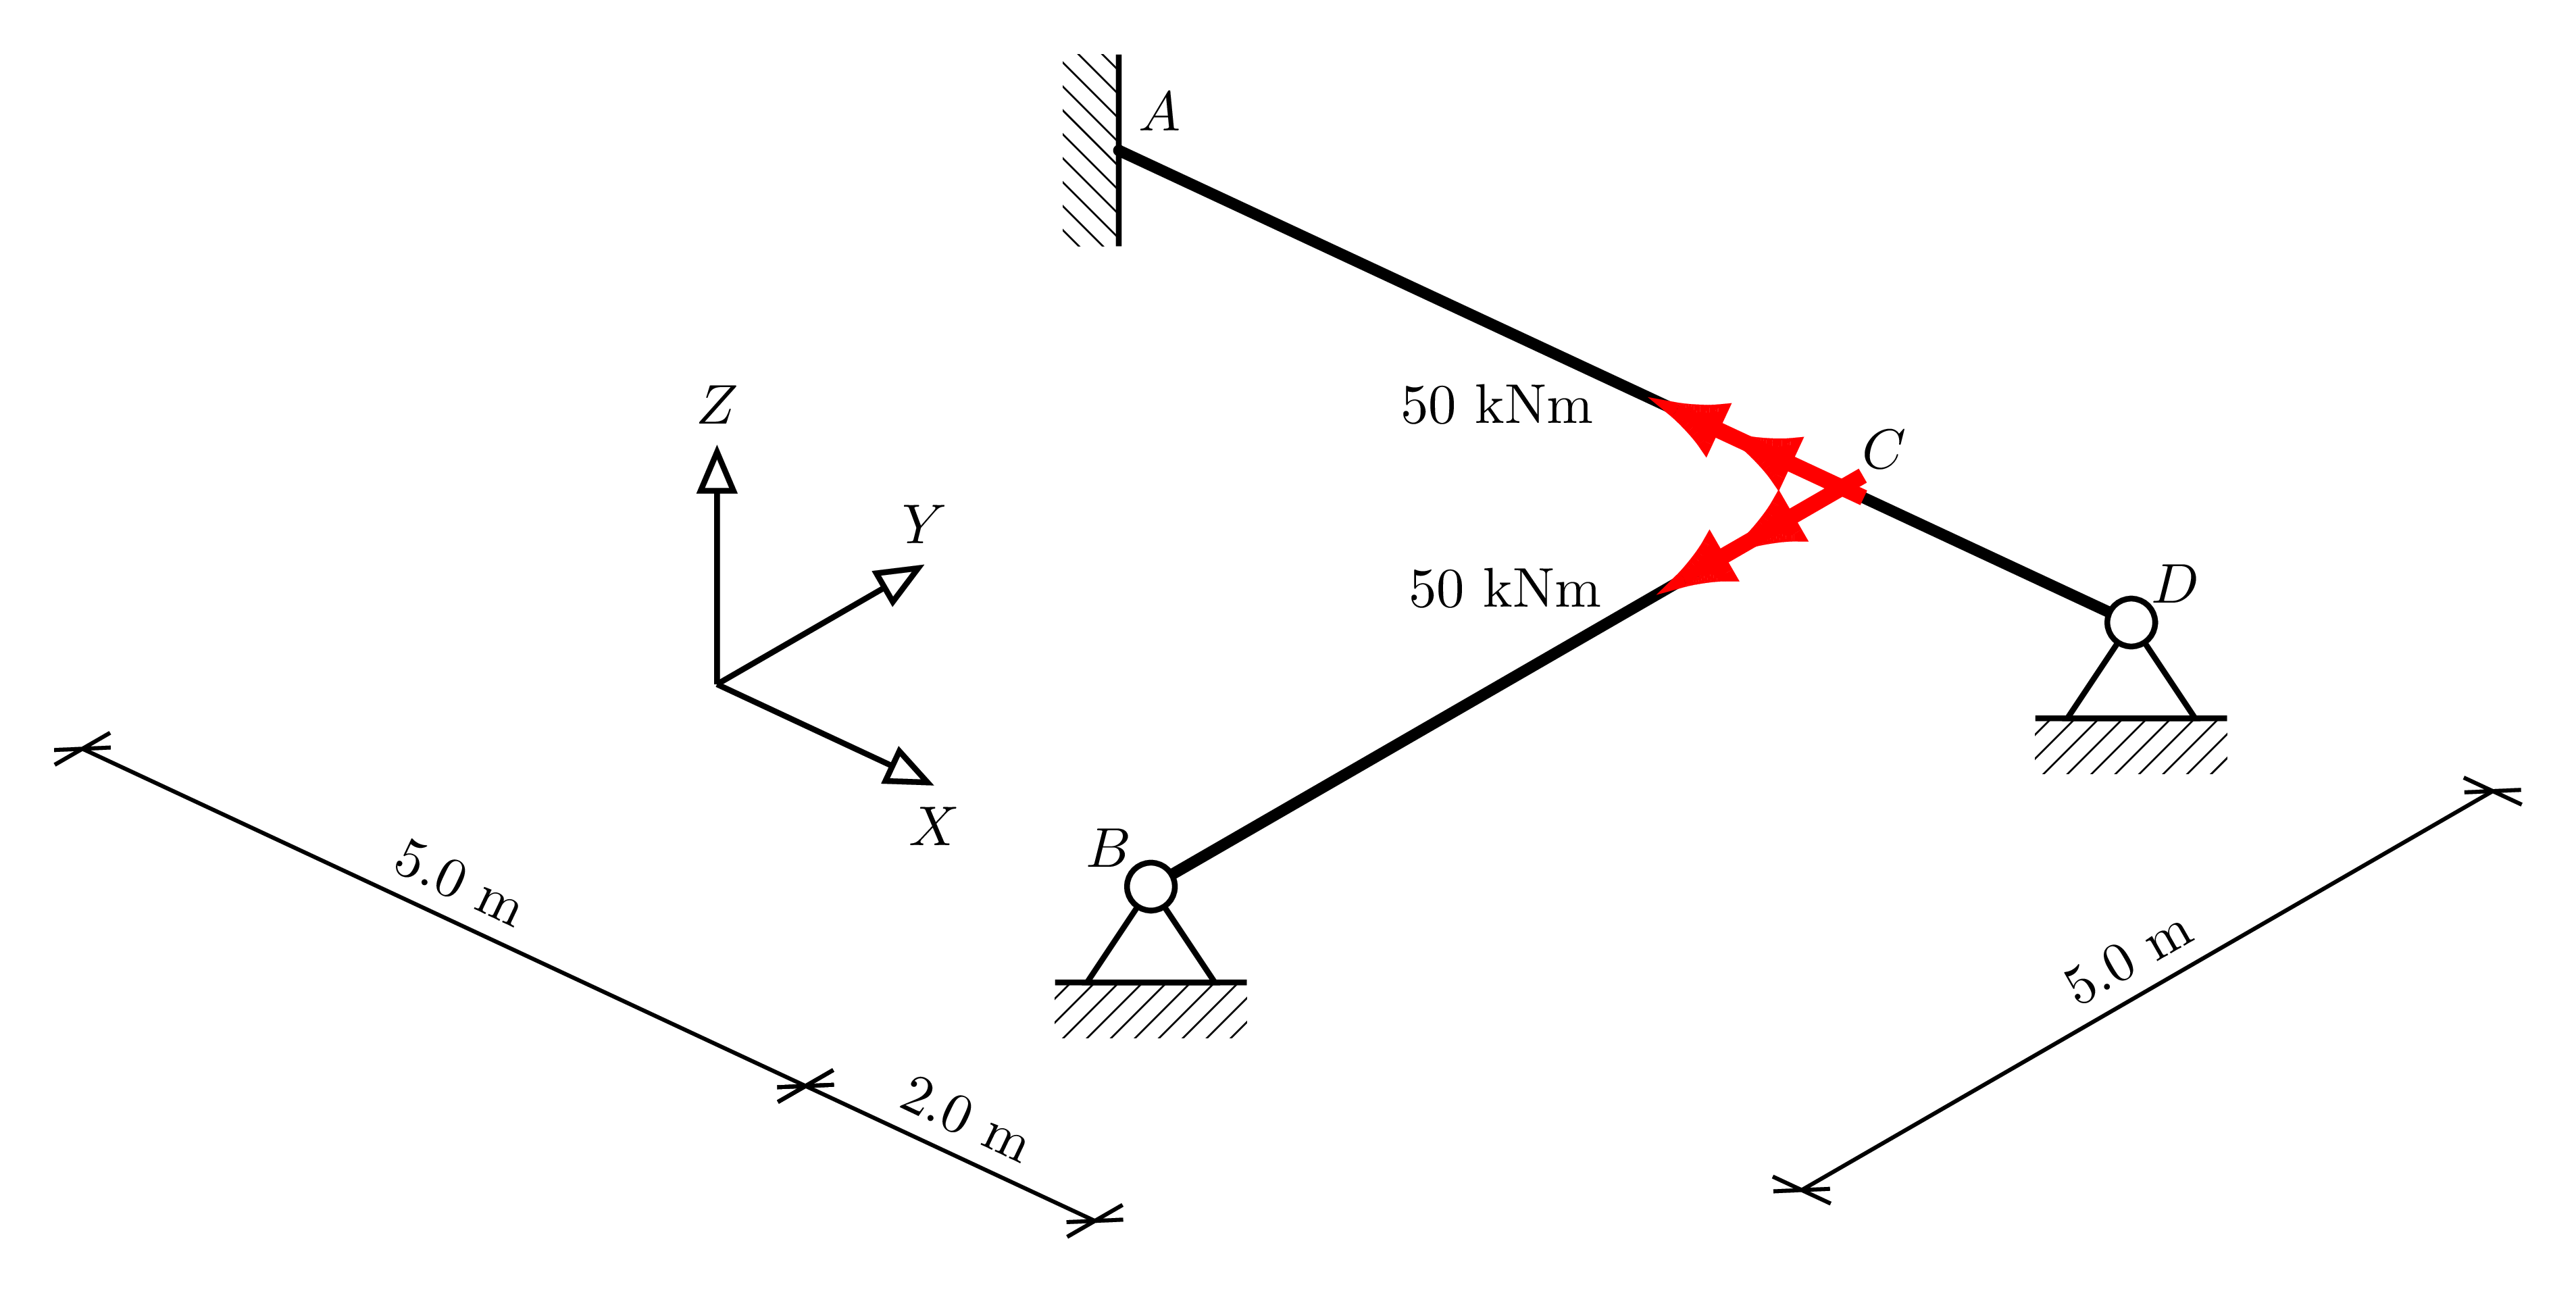

In [22]:
display.Image("./images/intro_ex_3.png",width=800)

Following the grid specification, this grid is encoded as:

In [23]:
grid_str = "AF-5:0,BX0:-5,CN0:0,DY2:0_C0:-50:-50_AC,CD,BC"

And we can make the grid using this string, and analyze as follows:

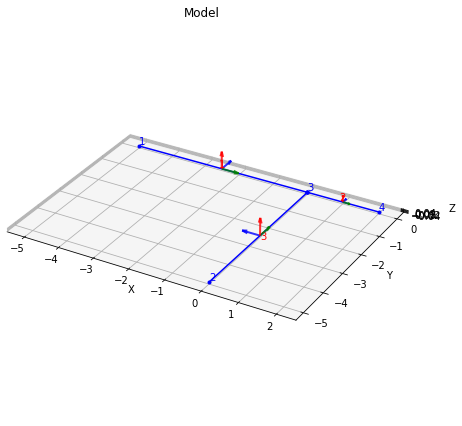

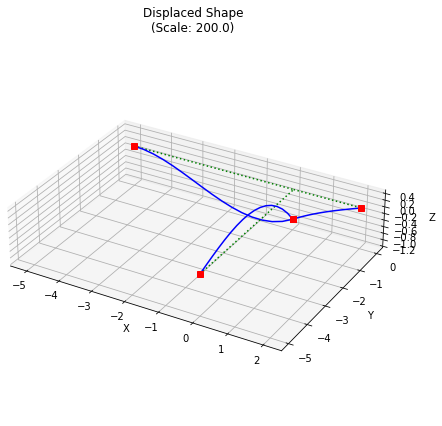

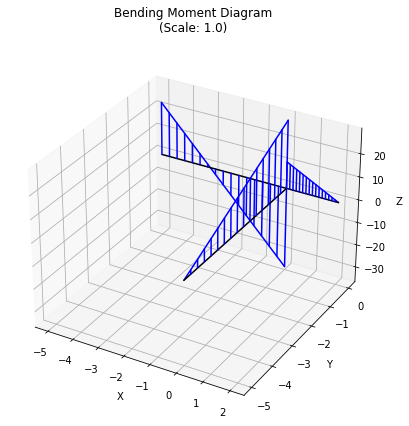

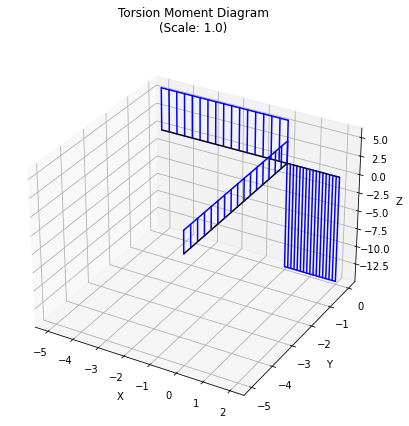

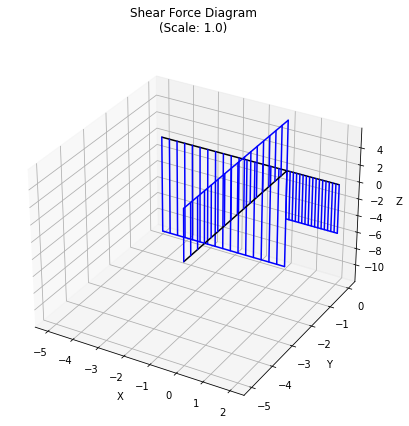

In [24]:
grid = ospg.make_grid(grid_str)
grid.analyze()
grid.plot_results()